### $\color{royalblue}{\text{Четврта вјежба из нумеричких метода у астрономији, датум: 25.12.2025.}} $

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Splajn_interpolacija import spline_interp 

#### $\color{magenta}{\text{СПЛАЈН интерполација.}}$

In [2]:
t, x, y, z = np.loadtxt('Saturn.dat', skiprows=2, delimiter=',', unpack=True)

t = t[0::10] 
x = x[0::10]
y = y[0::10]
z = z[0::10]

r = np.sqrt(x**2+y**2+z**2)

[9.95411371]


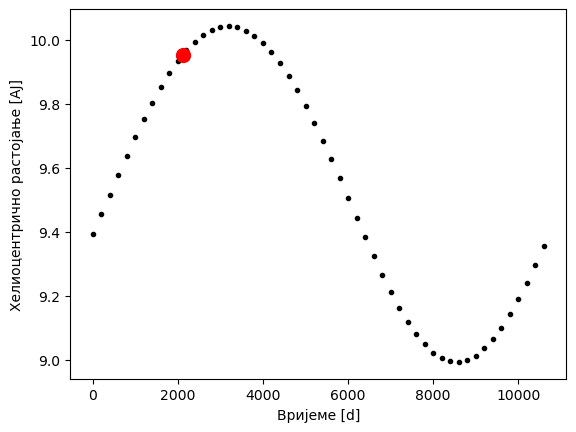

In [3]:
t0 = 2120
r0 = spline_interp(t, r, [t0])
print(r0)

plt.plot(t, r, '.', color='black') 
plt.plot(t0, r0, 'o', color='red', markersize=10)
plt.xlabel('Вријеме [d]')
plt.ylabel('Хелиоцентрично растојање [AJ]')
plt.show()

Поређење Сплајна и Лагранжовог интерполационог полинома.

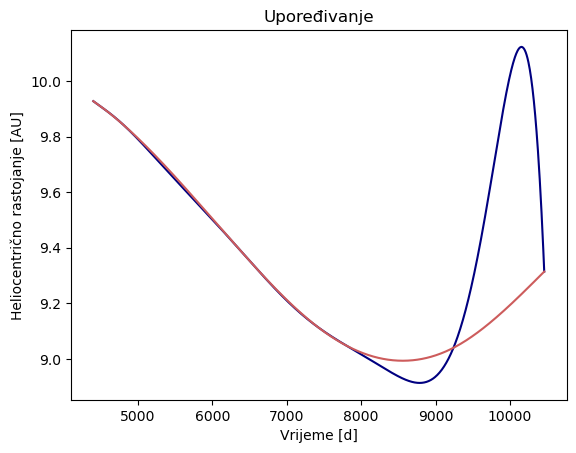

In [4]:
%run Interpolacioni_polinomi.ipynb #  pokretanje fajla sa funkcijama

import random
t,x,y,z = np.loadtxt('Saturn.dat', skiprows=2, delimiter=',', unpack=True)

broj_covorova = 10
izbor_cvorova = random.sample(range(200, len(t)), broj_covorova) # biramo nasumično 50 čvorova
izbor_cvorova.sort()
t=t[izbor_cvorova]
x=x[izbor_cvorova]
y=y[izbor_cvorova]
z=z[izbor_cvorova]

r=np.sqrt(x**2+y**2+z**2)

red=len(r)-1

# interpolacija na intervalu [i1,i2]
tt=np.linspace(t[0],t[-1],1000)

r_lagranz=lagranz(t,r,tt)
plt.plot(tt,r_lagranz, color='navy', label='Lagranž')
#plt.plot(t,r,'ok')

plt.xlabel('Vrijeme [d]')
plt.ylabel('Heliocentrično rastojanje [AU]')

r_splajn=spline_interp(t,r,tt)

plt.plot(tt,r_splajn, color='indianred', label='Splajn')

plt.xlabel('Vrijeme [d]')
plt.ylabel('Heliocentrično rastojanje [AU]')
plt.title('Upoređivanje')
plt.show()

Дводимензионална интерполација сплајном: хоћемо да одредимо надморску висину произвољног меридијана на Марсу са неким кораком по латитуди.

(720, 1440)
(720, 1440) (720, 1440)


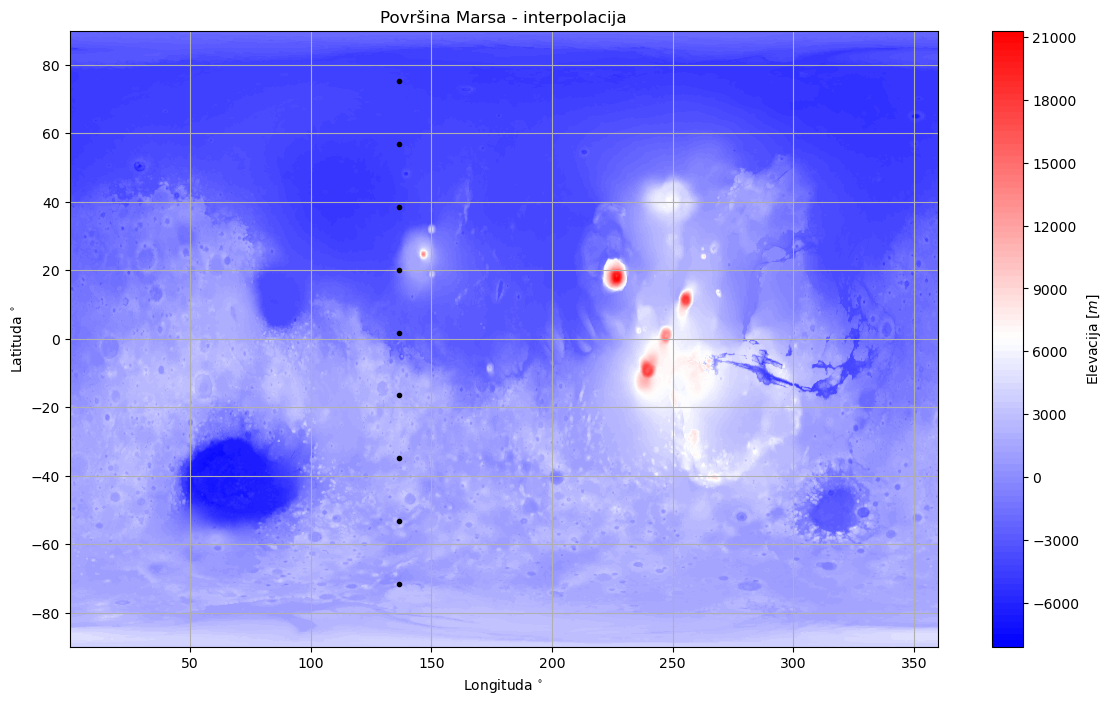

In [ ]:
korak = 18.36 # korak po latitudi
longituda0 = 136.59 # longituda na kojoj se traze nadmorske visine

latituda0 = np.arange(-90 + korak, 90, step = korak) # latituda na kojoj se traze nadmorske visine
# longituda0=np.ones(len(latituda0))*longituda0 # longituda na kojoj se traze nadmorske visine

h = np.loadtxt('topografija.dat', skiprows=2)
print(h.shape)

# pravljenje mreže longituda i latituda

longituda = np.arange(0.125, 360, step = 0.25)
latituda = np.arange(-89.875, 90, step = 0.25)
longituda, latituda=np.meshgrid(longituda, latituda)

print(longituda.shape, latituda.shape)

# rezon: h[i, j] predstavlja nadmorsku visinu na koordinatama (longituda[i, j], latituda[i, j])

fig = plt.figure(figsize=(14, 8))
plt.contourf(longituda, latituda, h, 100, cmap='bwr')
plt.xlabel(r'Longituda $^{\circ}$')
plt.ylabel(r'Latituda $^{\circ}$')
plt.grid()
cbar = plt.colorbar()
cbar.set_label('Elevacija $[m]$')
plt.plot(np.ones(len(latituda0))*longituda0, latituda0, '.k')
plt.title('Površina Marsa - interpolacija')
plt.show()

### Interpolacija splajnom na proizvoljnoj  longitudi:

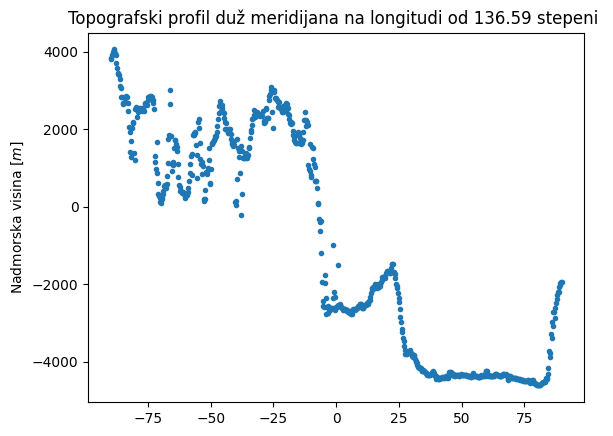

In [9]:
x = np.arange(0.125, 360, step = 0.25) # longituda
y = np.arange(-89.875, 90, step = 0.25) #latituda

h_interp = np.zeros(len(y))
for i in range(len(y)):
    hh = h[i]
    h_interp[i] = spline_interp(x, hh, [longituda0])
    
plt.plot(y,h_interp, '.')
plt.ylabel(r'Latituda $^{\circ}$')
plt.ylabel(r'Nadmorska visina $[m]$')
plt.title(f'Topografski profil duž meridijana na longitudi od {longituda0} stepeni ')
plt.show()

### "Dodatna" interpolacija za specifične latitude:

[  837.6952963    957.15687554  1499.09161889  1702.10997253
 -2575.80202626 -1666.23831112 -4238.91638664 -4387.02576863
 -4501.3114706 ]


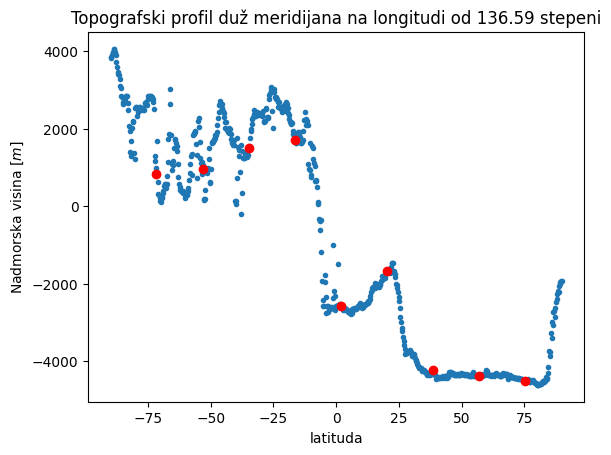

In [10]:
h0 = spline_interp(y, h_interp, latituda0)
print(h0)

plt.plot(y, h_interp, '.')
plt.plot(latituda0, h0, 'or')

plt.xlabel('latituda')
plt.ylabel(r'Nadmorska visina $[m]$')
plt.title(f'Topografski profil duž meridijana na longitudi od {longituda0} stepeni')
plt.show()

### $\color{green}{\text{ZADACI:}} $

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />

1. Одредити дебљину Мјесечеве коре дуж произвољног Мјесечевог паралела са произвољним кораком у лонгитуди.

<hr style="border: none; height: 2px; background-color: green; opacity: 0.5;" />